In [1]:
library(glue)
library(ggplot2)
library(tidyr)

In [52]:
df = cars

# the following already show: mean, median, and quartiles
summary(df)

     speed           dist       
 Min.   : 4.0   Min.   :  2.00  
 1st Qu.:12.0   1st Qu.: 26.00  
 Median :15.0   Median : 36.00  
 Mean   :15.4   Mean   : 42.98  
 3rd Qu.:19.0   3rd Qu.: 56.00  
 Max.   :25.0   Max.   :120.00  

In [3]:
# szorasi egyutthato
cv <- function(x) {
  return(sd(x, na.rm=TRUE) / abs(mean(x, na.rm=TRUE)))
}

In [4]:
mean_speed <- mean(df$speed)
median_speed <- median(df$speed)
corr_var_speed <- var(df$speed)
corr_std_speed <- sd(df$speed)
coeff_var_speed <- cv(df$speed)

glue("mean speed: {mean_speed}")
glue("median speed: {median_speed}")
glue("variance speed: {corr_var_speed}")
glue("standard deviation speed: {corr_std_speed}")
glue("coefficient of variance speed: {coeff_var_speed}")

mean speed: 15.4

median speed: 15

variance speed: 27.9591836734694

standard deviation speed: 5.28764443523478

coefficient of variance speed: 0.343353534755505

In [5]:
print("sorted dist")
print(sort(df$dist))

print("range of dist")
print(range(df$dist))

print("Q1")
print(quantile(df$dist, 0.25))

print("Q3")
print(quantile(df$dist, 0.75))

print("IQR")
print(IQR(df$dist))

[1] "sorted dist"
 [1]   2   4  10  10  14  16  17  18  20  20  22  24  26  26  26  26  28  28  32
[20]  32  32  34  34  34  36  36  40  40  42  46  46  48  50  52  54  54  56  56
[39]  60  64  66  68  70  76  80  84  85  92  93 120
[1] "range of dist"
[1]   2 120
[1] "Q1"
25% 
 26 
[1] "Q3"
75% 
 56 
[1] "IQR"
[1] 30


# Plots using ggplot2

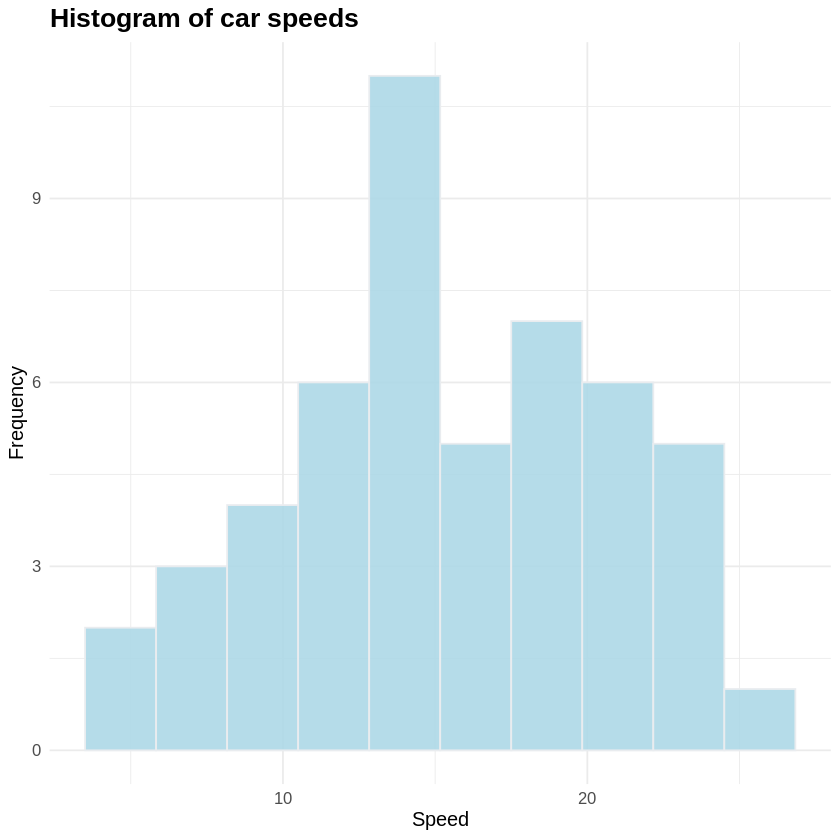

In [39]:
ggplot(df, aes(x = speed)) +
  geom_histogram(bins=10, fill="lightblue", color="#e9ecef", alpha=0.9) +
  labs(title="Histogram of car speeds",
       x="Speed",
       y="Frequency") +
  theme_minimal() +
  theme(
    plot.title=element_text(size=16, face="bold"),
    axis.title=element_text(size=12),
    axis.text=element_text(size=10)
  )

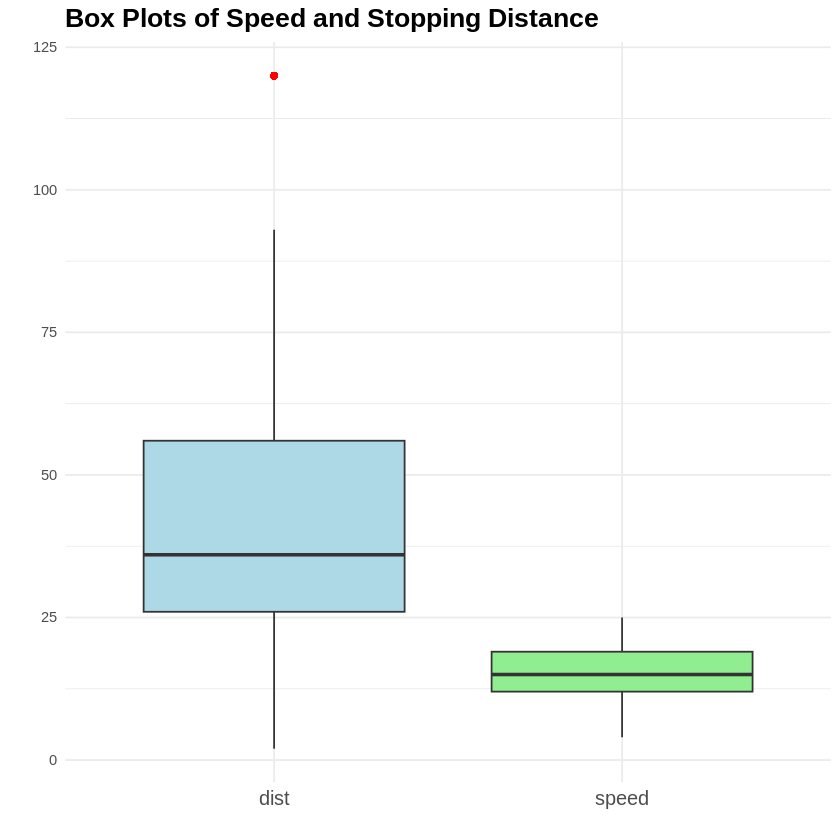

In [42]:
# Magic code to reshape dataframe from widt to long format.
# No clue why this is a problem
cars_long <- cars %>%
  pivot_longer(cols=c(speed, dist), names_to="variable", values_to="value")

ggplot(cars_long, aes(x=variable, y=value, fill=variable)) +
  geom_boxplot(outlier.color="red", outlier.shape=16, outlier.size=2) +
  scale_fill_manual(values=c("speed"="lightgreen", "dist"="lightblue")) +
  labs(
    title="Box Plots of Speed and Stopping Distance",
    x="", # hide the useless axis names
    y=""
  ) +
  theme_minimal() +
  theme(
    plot.title=element_text(size=16, face="bold"),
    axis.title.y=element_text(size=12),
    axis.text.x=element_text(size=12),
    legend.position="none" # remove the comepletely useless legend
  )


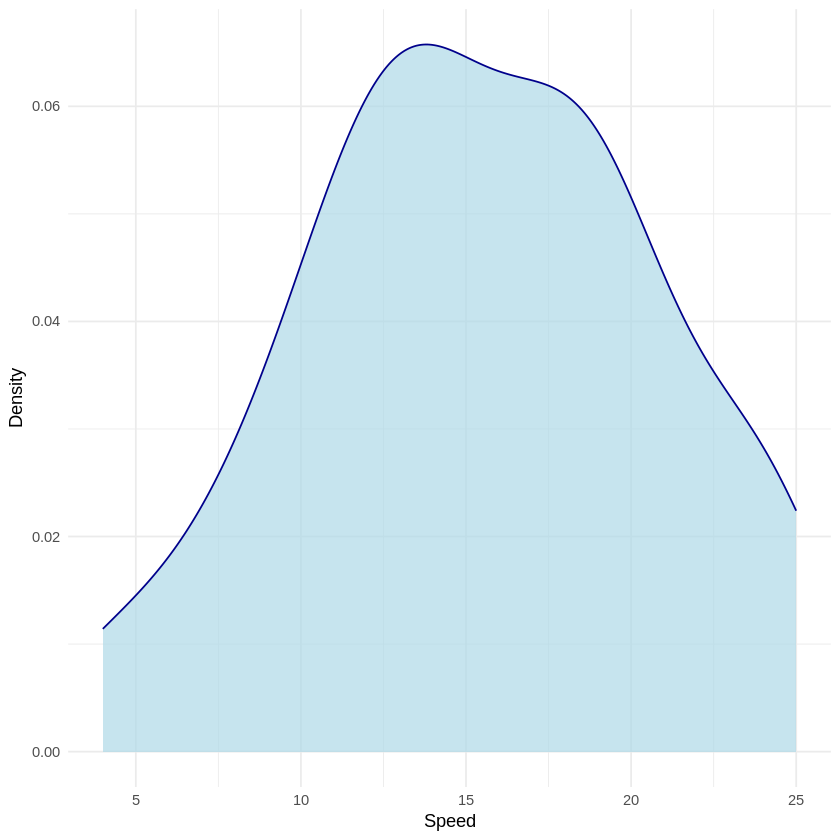

In [43]:
ggplot(df, aes(x = speed)) +
  geom_density(fill="lightblue", alpha=0.7, color="darkblue") +
  theme_minimal() +
  labs(x="Speed", y="Density")

# Boring plots

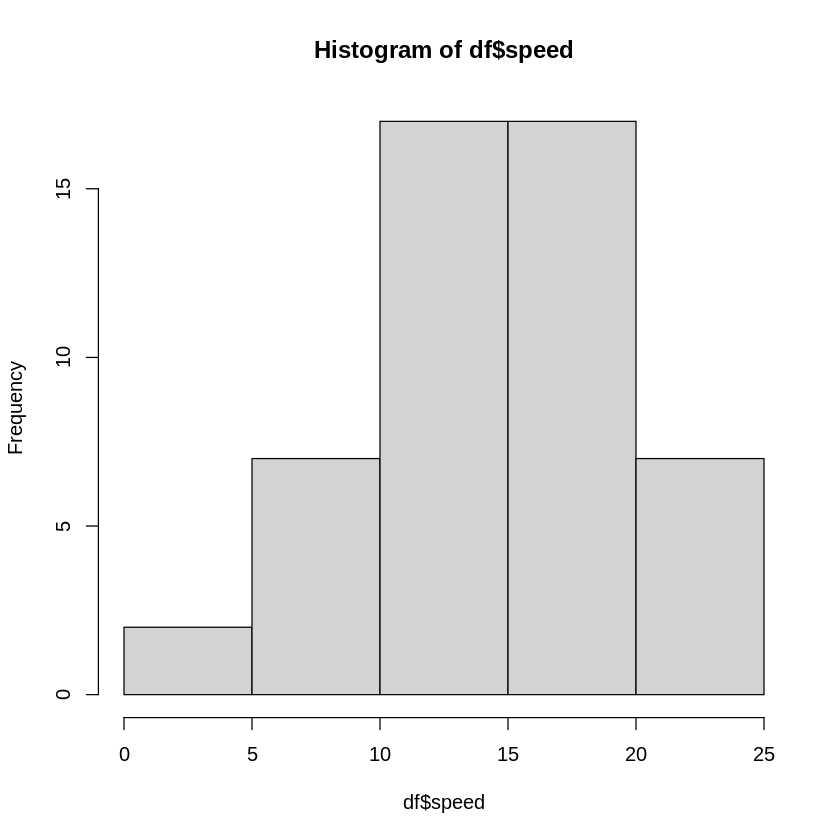

In [47]:
hist(df$speed)

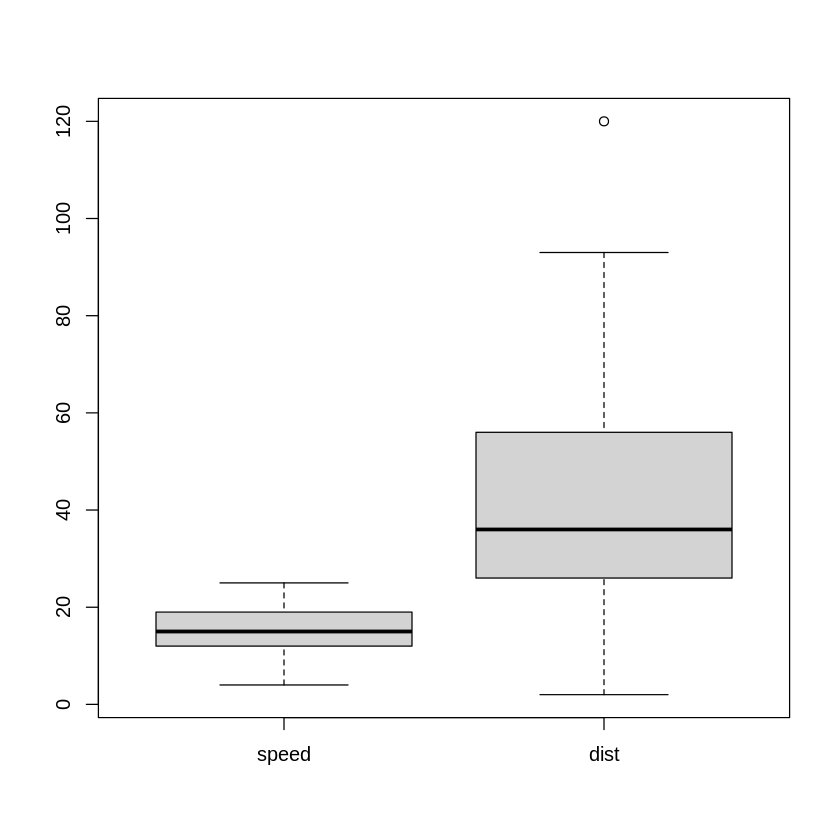

In [48]:
boxplot(df)

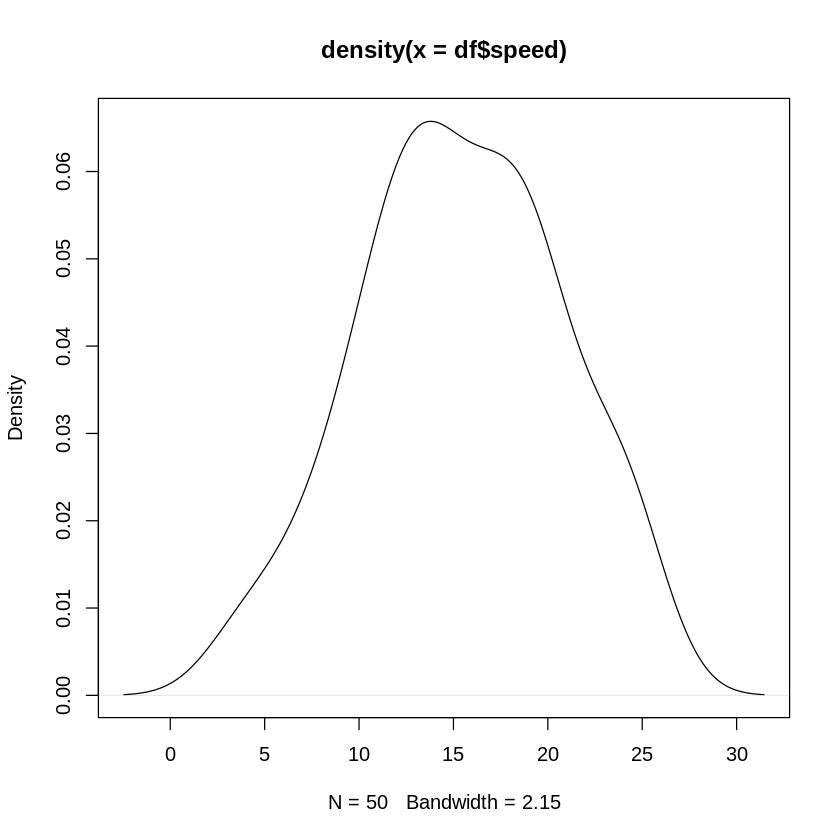

In [49]:
plot(density(df$speed))